Loaded U from ../../../projects/single_cell_files/tensor_1Mb_AB_calls/chr2/sc1.ACTTGA_compartment.h5
Loaded V from ../../../projects/single_cell_files/tensor_1Mb_AB_calls/chr2/sc1.ACTTGA_weights.h5


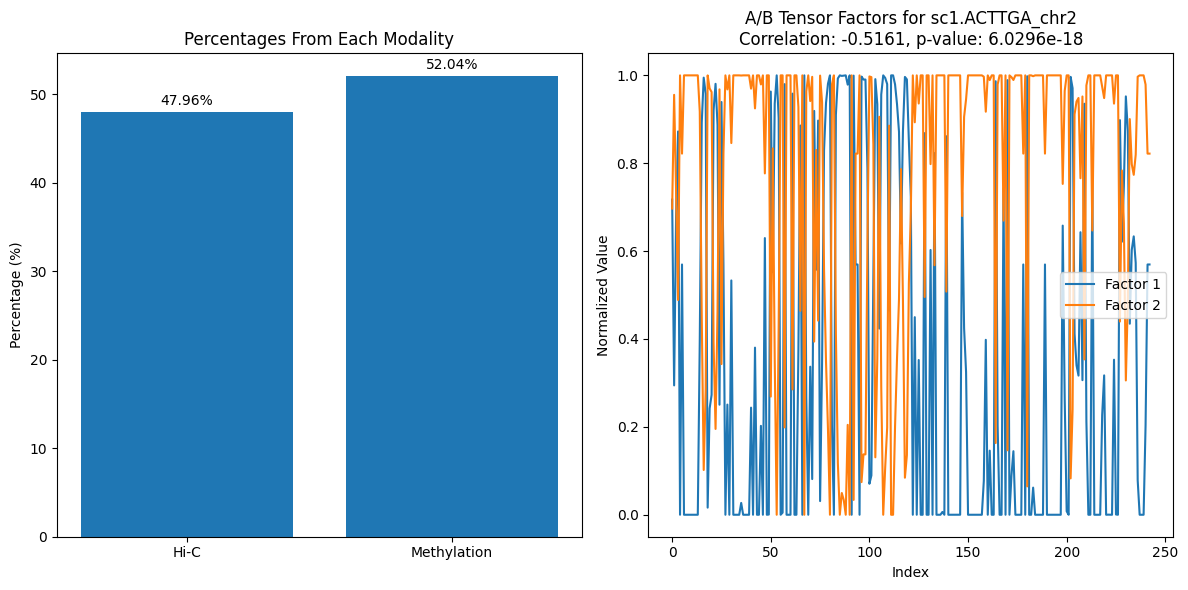

In [13]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import os
from scipy.stats import pearsonr

def load_h5_file(file_path, dataset_name):
    """Load a dataset from an HDF5 file."""
    with h5py.File(file_path, 'r') as f:
        data = f[dataset_name][:]
    return data

def normalize_vectors(V):
    """Normalize the columns of V to have a norm of 1."""
    norms = np.linalg.norm(V, axis=0)
    norms[norms == 0] = 1  # Prevent division by zero
    V_normalized = V / norms
    return V_normalized

def calculate_correlation(V):
    """Calculate the correlation and p-value between the two vectors of V."""
    if V.shape[0] == 2:  # Assuming V has two vectors
        correlation, p_value = pearsonr(V[0, :], V[1, :])
        return correlation, p_value
    else:
        print("V does not have exactly two vectors for correlation calculation.")
        return None, None

def plot_factors(U, V, chromosome, prefix):
    """Plot the rank-two factors U as bar plots and V as normalized line plots."""
    plt.figure(figsize=(12, 6))

    # Calculate percentages for U factors
    weights_sum = U[0, :].sum()
    weights_percentages = (U[0, :] / weights_sum) * 100

    # Plot U factors as bar plots with percentages
    plt.subplot(1, 2, 1)
    bars = plt.bar(np.arange(len(weights_percentages)), weights_percentages)
    plt.title(f'Percentages From Each Modality')
    plt.ylabel('Percentage (%)')

    # Add labels to each bar
    for bar, percentage in zip(bars, weights_percentages):
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, f'{percentage:.2f}%', ha='center', va='bottom')

    # Set custom x-tick labels
    plt.xticks(np.arange(len(weights_percentages)), ['Hi-C', 'Methylation'])

    # Normalize V factors
    V_normalized = normalize_vectors(V)

    # Calculate correlation and p-value
    correlation, p_value = calculate_correlation(V)

    # Plot V factors as line plots
    plt.subplot(1, 2, 2)
    for i in range(V_normalized.shape[0]):
        plt.plot(V_normalized[i, :], label=f'Factor {i+1}')
    plt.title(f'A/B Tensor Factors for {prefix}_{chromosome}\n'
              f'Correlation: {correlation:.4f}, p-value: {p_value:.4e}')
    plt.xlabel('Index')
    plt.ylabel('Normalized Value')
    plt.legend()

    plt.tight_layout()
    plt.show()

    
def analyze_files(output_directory, chromosome, prefix):
    """Load U and V from HDF5 files, plot them, and calculate correlation."""
    output_file_U = os.path.join(output_directory, 'tensor_1Mb_AB_calls', chromosome, f'{prefix}_compartment.h5')
    output_file_V = os.path.join(output_directory, 'tensor_1Mb_AB_calls', chromosome, f'{prefix}_weights.h5')

    if os.path.exists(output_file_U) and os.path.exists(output_file_V):
        U = load_h5_file(output_file_U, '/U')
        V = load_h5_file(output_file_V, '/V')
        
        print(f'Loaded U from {output_file_U}')
        print(f'Loaded V from {output_file_V}')

        plot_factors(U, V, chromosome, prefix)
    else:
        print(f'Missing files for {output_file_U}, skipping...')

# Example usage
output_directory = '../../../projects/single_cell_files'
chromosome = 'chr2'  # Example chromosome
prefix = 'sc1.ACTTGA'  # Example prefix

analyze_files(output_directory, chromosome, prefix)


In [37]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import os
from scipy.stats import pearsonr

def load_h5_file(file_path, dataset_name):
    """Load a dataset from an HDF5 file."""
    with h5py.File(file_path, 'r') as f:
        data = f[dataset_name][:]
    return data

def normalize_vectors(V):
    """Normalize the columns of V to have a norm of 1."""
    norms = np.linalg.norm(V, axis=0)
    norms[norms == 0] = 1  # Prevent division by zero
    V_normalized = V / norms
    return V_normalized

def calculate_correlation(V):
    """Calculate the correlation and p-value between the two vectors of V."""
    if V.shape[0] == 2:  # Assuming V has two vectors
        correlation, p_value = pearsonr(V[0, :], V[1, :])
        return correlation, p_value
    else:
        print("V does not have exactly two vectors for correlation calculation.")
        return None, None

def plot_factors(U, V, chromosome, prefix):
    """Plot the rank-two factors U as bar plots and V as normalized line plots."""
    plt.figure(figsize=(12, 6))

    # Calculate percentages for U factors
    weights_sum = U[0, :].sum()
    weights_percentages = (U[0, :] / weights_sum) * 100

    # Plot U factors as bar plots with percentages
    plt.subplot(1, 2, 1)
    bars = plt.bar(np.arange(len(weights_percentages)), weights_percentages)
    plt.title(f'Percentages From Each Modality')
    plt.ylabel('Percentage (%)')

    # Add labels to each bar
    for bar, percentage in zip(bars, weights_percentages):
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, f'{percentage:.2f}%', ha='center', va='bottom')

    # Set custom x-tick labels
    plt.xticks(np.arange(len(weights_percentages)), ['Hi-C', 'Methylation'])

    # Normalize V factors
    V_normalized = normalize_vectors(V)

    # Calculate correlation and p-value
    correlation, p_value = calculate_correlation(V)

    # Plot V factors as line plots
    plt.subplot(1, 2, 2)
    for i in range(V_normalized.shape[0]):
        plt.plot(V_normalized[i, :], label=f'Factor {i+1}')
    plt.title(f'A/B Tensor Factors for {prefix}_{chromosome}\n'
              f'Correlation: {correlation:.4f}, p-value: {p_value:.4e}')
    plt.xlabel('Index')
    plt.ylabel('Normalized Value')
    plt.legend()

    plt.tight_layout()
    plt.show()

    return correlation, weights_percentages

def extract_prefixes(file_path):
    """Extract prefixes from the filtered_bam_list.txt file."""
    prefixes = []
    with open(file_path, 'r') as file:
        for line in file:
            # Assuming the prefix format is like "sc11.ACTTGA" or similar
            parts = line.strip().split('.')
            if len(parts) >= 2:
                prefix = parts[0] + '.' + parts[1]  # Concatenate the first two parts to get the full prefix
                prefixes.append(prefix)
    return prefixes

def analyze_files_plotting(output_directory, chromosomes, prefixes):
    """Load U and V from HDF5 files, plot them, calculate correlation, and print results."""
    for chromosome in chromosomes:
        for prefix in prefixes:
            output_file_U = os.path.join(output_directory, 'tensor_1Mb_AB_calls', chromosome, f'{prefix}_compartment.h5')
            output_file_V = os.path.join(output_directory, 'tensor_1Mb_AB_calls', chromosome, f'{prefix}_weights.h5')

            if os.path.exists(output_file_U) and os.path.exists(output_file_V):
                U = load_h5_file(output_file_U, '/U')
                V = load_h5_file(output_file_V, '/V')
                
                print(f'Loaded U from {output_file_U}')
                print(f'Loaded V from {output_file_V}')

                correlation, weights_percentages = plot_factors(U, V, chromosome, prefix)

                # Print out correlation and weights percentages
                print(f'Correlation for {prefix} on {chromosome}: {correlation:.4f}')
                print(f'Weights percentages for {prefix} on {chromosome}: Hi-C: {weights_percentages[0]:.2f}%, Methylation: {weights_percentages[1]:.2f}%\n')
            else:
                print(f'Missing files for {output_file_U} or {output_file_V}, skipping...')

                
                
def analyze_files(output_directory, chromosomes, prefixes):
    """Load U and V from HDF5 files, calculate correlation, and average results."""
    total_correlation = 0
    total_weight_hi_c = 0
    total_weight_methylation = 0
    valid_combinations = 0

    for chromosome in chromosomes:
        for prefix in prefixes:
            output_file_U = os.path.join(output_directory, 'tensor_1Mb_AB_calls', chromosome, f'{prefix}_compartment.h5')
            output_file_V = os.path.join(output_directory, 'tensor_1Mb_AB_calls', chromosome, f'{prefix}_weights.h5')
            
            if os.path.exists(output_file_U) and os.path.exists(output_file_V):
                U = load_h5_file(output_file_U, '/U')
                V = load_h5_file(output_file_V, '/V')
                
                # Calculate percentages for U factors
                weights_sum = U[0, :].sum()
                weights_percentages = (U[0, :] / weights_sum) * 100

                # Normalize V factors and calculate correlation
                V_normalized = normalize_vectors(V)
                correlation, p_value = calculate_correlation(V)

                # Check if the correlation is valid (not NaN)
                if correlation is not None and not np.isnan(correlation):
                    total_correlation += correlation
                    total_weight_hi_c += weights_percentages[0]
                    total_weight_methylation += weights_percentages[1]
                    valid_combinations += 1
                else:
                    print(f'Invalid correlation for {prefix} on {chromosome}, skipping...')
            else:
                print(f'Missing files for {output_file_U} or {output_file_V}, skipping...')

    # Calculate the averages only if there were valid combinations
    if valid_combinations > 0:
        avg_correlation = total_correlation / valid_combinations
        avg_weight_hi_c = total_weight_hi_c / valid_combinations
        avg_weight_methylation = total_weight_methylation / valid_combinations

        print(f'Average Correlation: {avg_correlation:.4f}')
        print(f'Average Hi-C Weight Percentage: {avg_weight_hi_c:.2f}%')
        print(f'Average Methylation Weight Percentage: {avg_weight_methylation:.2f}%')
    else:
        print("No valid combinations of chromosomes and prefixes found.")
                         
# Example usage
output_directory = '../../../projects/single_cell_files/'
filtered_bam_list = output_directory + 'filtered_bam_list.txt'

# Extract prefixes from the file
prefixes = extract_prefixes(filtered_bam_list)

# Define chromosomes to analyze
chromosomes = [f'chr{i}' for i in range(1, 23)]

# Run the analysis for all prefixes and chromosomes
analyze_files(output_directory, chromosomes, prefixes)


Invalid correlation for sc31.ACTTGA on chr9, skipping...
Invalid correlation for sc29.GCCAAT on chr14, skipping...
Missing files for ../../../projects/single_cell_files/tensor_1Mb_AB_calls/chr16/sc16.GCCAAT_compartment.h5 or ../../../projects/single_cell_files/tensor_1Mb_AB_calls/chr16/sc16.GCCAAT_weights.h5, skipping...
Missing files for ../../../projects/single_cell_files/tensor_1Mb_AB_calls/chr16/sc16.TAGCTT_compartment.h5 or ../../../projects/single_cell_files/tensor_1Mb_AB_calls/chr16/sc16.TAGCTT_weights.h5, skipping...
Missing files for ../../../projects/single_cell_files/tensor_1Mb_AB_calls/chr16/sc17.ACTTGA_compartment.h5 or ../../../projects/single_cell_files/tensor_1Mb_AB_calls/chr16/sc17.ACTTGA_weights.h5, skipping...
Missing files for ../../../projects/single_cell_files/tensor_1Mb_AB_calls/chr16/sc17.CGATGT_compartment.h5 or ../../../projects/single_cell_files/tensor_1Mb_AB_calls/chr16/sc17.CGATGT_weights.h5, skipping...
Missing files for ../../../projects/single_cell_files